In [5]:
# 인터넷상에서 데이터를 수집하고 분석하기 위한 모듈을 import

import requests
from bs4 import BeautifulSoup

In [6]:
# 네이버 증권에서 삼성전자의 관련 데이터를 requests 모듈을 이용하여 수집
url = 'https://finance.naver.com/item/main.naver?code=005930'
r = requests.get(url)

In [7]:
# 인터넷에서 수집된 HTML 파일을 분석하기 위해 BeautifulSoup() 함수를 이용
# id='_per'인 데이터 수집
soup = BeautifulSoup(r.text)
soup.find(id='_per')

<em id="_per">9.38</em>

In [8]:
# id='_per'인 데이터에서 text를 추출
soup.find(id='_per').text

'9.38'

In [9]:
# 문자열을 실수형으로 변환
float(soup.find(id='_per').text)

9.38

In [10]:
# 인터넷상에서 데이터 수집을 위해 필요한 모듈을 import 한다.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 필요로 하는 회사명과 종목코드를 리스트에 저장
stock_list = [
    ["삼성전자", "005930"],
    ["SK하이닉스", "000660"],
    ["현대차", "005380"],
    ["셀트리온", "068270"],
    ["LG화학", "051910"],
    ["삼성바이오로직스", "207940"],
    ["JB금융지주", "175330"]
]

# 네이버증권에서 종목코드를 입력면 per와 eps를 반환하는 함수를 작성하여 반복적으로 사용가능하도록
# 한다.
def stock_factor(code):
    url = f'https://finance.naver.com/item/main.naver?code={code}'
    r = requests.get(url)
    soup = BeautifulSoup(r.text)
    per = float(soup.find(id='_per').text.replace(',',''))
    eps = float(soup.find(id='_eps').text.replace(',',''))
    return per, eps

# 종목명과 종목코드로 stock_factor() 함수를 이용하여 per와 eps를 구하고 리스트(row_list)에 
# 저장한다. 
row_list = []
for name, code in stock_list:
    per, eps = stock_factor(code)
    row_list.append([name, code, per, eps])

# row_list 데이터를 판다스의 데이터 프레임으로 변환한다.
df = pd.DataFrame(row_list, columns=['종목명', '코드', 'PER', 'EPS'])

# 데이터프레임에 저장된 데이터를 판다스가 제공하는 기능(to_excel())을 이용하여 엑셀로 저장한다.
df.to_excel('개별종목팩터데이터.xlsx')
df

,종목명,코드,PER,EPS
0,삼성전자,005930,9.38,6372.0
1,SK하이닉스,000660,6.63,14548.0
2,현대차,005380,9.05,18777.0
3,셀트리온,068270,42.67,3586.0
4,LG화학,051910,14.83,38978.0
5,삼성바이오로직스,207940,116.17,7162.0
6,JB금융지주,175330,2.89,2747.0


In [11]:
# 인터넷상에서 테이블로 존재하는 데이터를 판다스의 read_html을 이용하여 바로 데이터프레임으로 
# 저장한다.


import pandas as pd

# 인코딩에 주의하여 데이터를 수집한다.
df_list = pd.read_html('https://finance.naver.com/marketindex/', encoding='euc-kr')

# 원하는 데이터가 몇번째 인덱스에 저정되었는지 확인후 df에 저장한다.
df = df_list[0]

# 저장된 데이터프레임에서 엑셀로 전환하여 저장한다.
df.to_excel('국내시장금리.xlsx')

In [12]:
# 필요한 모듈을 import 한다.
import pandas as pd
from datetime import datetime # 일자 및 시간 데이터를 사용하기 위해 datetime모듈 imort

df_list = pd.read_html('https://finance.naver.com/marketindex/', encoding='euc-kr')
df = df_list[0]

# 현재 일시를 구한다.
dt = datetime.now()

# strftime()를 이용하여 datetime 형식을 문자열 형식으로 전환하여 국내시장금리를 일자별로 엑셀로
# 저장한다.
df.to_excel(f"국내시장금리_{dt.strftime('%Y%m%d')}.xlsx")

<AxesSubplot:>

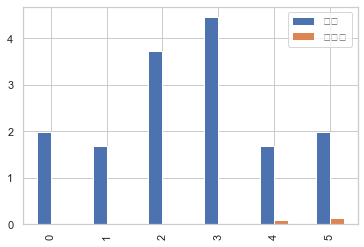

In [15]:
%matplotlib inline
df.plot.bar()